In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import gridspec
import ast
import os
#os.chdir('/home/bojk/Data/') #this is when opened in '/home/bojk/Data/notebooks' on linux Quakelab
os.chdir('/Users/bojk/Google Drive/QuakeLab/Data/')
import sys
sys.path.append('/home/bojk/Data/minimeta_pyfiles/')
sys.path.append('/Users/bojk/Google Drive/QuakeLab/minimeta_pyfiles/')
import imp
import HTSeq
from scipy.stats import powerlaw
import minimetagenome_analysis as minimeta

import mock_metagenome_creation as mock
imp.reload(mock)
#import reassembly as rea
#import subcluster_bins as sub
#import checkm_out_plot as cop
#import checkm_out as co

import matplotlib as mpl
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['axes.titlesize'] = 15
mpl.rcParams['figure.titlesize'] = 18
mpl.rcParams['legend.fontsize'] = 14

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [95]:
#metagenome_fasta = '/home/datastorage/ASSEMBLY_DATA/PermafrostFranklinBluffs/Combined_Analysis/super_contigs.PermafrostWestD.fasta'
metagenome_fasta = 'Permafrost/WestDock/super_contigs.PermafrostWestDock.fasta'
save_dir = 'Permafrost/WestDock/pickles/'

In [62]:
maindf = pd.read_pickle('Permafrost/WestDock/20180904hdbfinal')
contigdf = maindf[['Sequence Length','GC Content','Read Depth']].copy()
contig2 = pd.read_csv('Permafrost/SIMR/WestDock_metadata.table').set_index('Unnamed: 0')[['Sequence Length','GC Content','Read Depth']]
contigdf.rename(index=str,columns={'Sequence Length':'Sequence length','GC Content':'GC'},inplace=True)
#contig2.rename(index=str,columns={'Sequence Length':'Sequence length','GC Content':'GC'},inplace=True)

In [4]:
chip = pd.read_csv('Permafrost/WestDock/super_contigs.PermafrostWestDock.alignment_report.txt','\t').set_index('Unnamed: 0')
chip.drop('WestDock5_Bulk',axis=1, inplace=True)

In [5]:
chip_mini = chip[~chip.index.str.contains('Bulk')]

In [6]:
chip_mini.shape
chip_mini[chip_mini.isna()].sum().sum()

0.0

In [57]:
maindf.head()

,Scaffold ID,Scaffold Name,Genome ID,Genome,Gene Count,Sequence Length,GC Content,Read Depth,Lineage Domain,Lineage Phylum,...,y_70_n,y_80_a,y_80_n,DBclusternum,finclu,Bin,bulk_cov,norm_cov,FPK,FPK_log
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
SuperContig_k91_123_flag=0_multi=12.4853_len=5216_WestDock5_Bulk,3300022818 assembled Ga0255658_100002,100002,3300022818,Permafrost soil microbial communities from Wes...,7,5216,0.65,1,Bacteria,Actinobacteria,...,-20.794870,25.229956,-5.094186,3,0,000,536.0,0.102761,102.760736,2.011827
SuperContig_k91_818_flag=1_multi=10.4127_len=5363_WestDock5_Bulk,3300022818 assembled Ga0255658_100017,100017,3300022818,Permafrost soil microbial communities from Wes...,9,5363,0.71,1,Bacteria,Firmicutes,...,-12.769647,25.557776,2.185190,3,0,000,1052.0,0.196159,196.158866,2.292608
SuperContig_k91_2173_flag=0_multi=17.1559_len=5555_WestDock5_Bulk,3300022818 assembled Ga0255658_100035,100035,3300022818,Permafrost soil microbial communities from Wes...,9,5555,0.57,1,Bacteria,Proteobacteria,...,-33.369970,15.494744,-27.721259,13,1,001,504.0,0.090729,90.729073,1.957746
SuperContig_k91_2472_flag=1_multi=8.5646_len=5745_WestDock5_Bulk,3300022818 assembled Ga0255658_100037,100037,3300022818,Permafrost soil microbial communities from Wes...,5,5745,0.66,1,Bacteria,Unassigned,...,-18.576481,24.871854,-2.703166,3,0,000,370.0,0.064404,64.403829,1.808912
SuperContig_k91_2863_flag=0_multi=9.2367_len=5169_WestDock5_Bulk,3300022818 assembled Ga0255658_100043,100043,3300022818,Permafrost soil microbial communities from Wes...,7,5169,0.49,1,Bacteria,Unassigned,...,-14.056690,-3.432112,-15.999414,10,2,002,412.0,0.079706,79.705939,1.901491


In [7]:
idx_incl = chip_mini.index
#chip_mini.divide(contig2.loc[idx_incl,'Sequence length'].astype(float),axis=0)
#contig2

In [50]:
num_dims = len(chip_mini.T)
pcs_to_reduce = [int(round(f)) for f in np.logspace(0,3,20)[4:]]
[f for f in pcs_to_reduce if f<num_dims]

[4, 6, 9, 13, 18, 26, 38, 55, 78, 113]

In [44]:
import minimetagenome_dimensionality as miniD
imp.reload(miniD)
maindir = 'Permafrost/WestDock/kmerPCA/'
thres3kb = chip_mini[chip_mini>3000].dropna(how='all').fillna(0)
thres5kb = chip_mini[chip_mini>5000].dropna(how='all').fillna(0)
thres7kb = chip_mini[chip_mini>7000].dropna(how='all').fillna(0)
thres10kb = chip_mini[chip_mini>10000].dropna(how='all').fillna(0)
#contig2.loc[idx,'Sequence length'].sum()
tsnedf3kb = miniD.perform_complete_analysis_Coverage(thres3kb,6,contig2,maindir,'WDminichipCov3kbthres')

building tSNE of all 160 dimensions
finished building main tSNE, this took 547.23 seconds
performing cluster sweep of tSNE of all 160 dimensions
Performing PCA...
building tSNE of 4 PCs
finished building tSNE of 4 PCs, this took 488.98 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 6 PCs
finished building tSNE of 6 PCs, this took 422.07 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 9 PCs
finished building tSNE of 9 PCs, this took 429.06 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 13 PCs
finished building tSNE of 13 PCs, this took 428.49 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 18 PCs
finished building tSNE of 18 PCs, this took 429.71 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 26 PCs
finished building tSNE of 26 PCs, this took 454.92 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE o

In [45]:
tsnedf5kb = miniD.perform_complete_analysis_Coverage(thres5kb,6,contig2,maindir,'WDminichipCov5kbthres')

building tSNE of all 160 dimensions
finished building main tSNE, this took 466.58 seconds
performing cluster sweep of tSNE of all 160 dimensions
Performing PCA...
building tSNE of 4 PCs
finished building tSNE of 4 PCs, this took 1728.42 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 6 PCs
finished building tSNE of 6 PCs, this took 372.15 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 9 PCs
finished building tSNE of 9 PCs, this took 372.84 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 13 PCs
finished building tSNE of 13 PCs, this took 401.27 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 18 PCs
finished building tSNE of 18 PCs, this took 409.09 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 26 PCs
finished building tSNE of 26 PCs, this took 411.19 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE 

In [46]:
tsnedf7kb = miniD.perform_complete_analysis_Coverage(thres7kb,6,contig2,maindir,'WDminichipCov7kbthres')

building tSNE of all 160 dimensions
finished building main tSNE, this took 245.52 seconds
performing cluster sweep of tSNE of all 160 dimensions
Performing PCA...
building tSNE of 4 PCs
finished building tSNE of 4 PCs, this took 224.28 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 6 PCs
finished building tSNE of 6 PCs, this took 218.94 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 9 PCs
finished building tSNE of 9 PCs, this took 212.90 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 13 PCs
finished building tSNE of 13 PCs, this took 222.91 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 18 PCs
finished building tSNE of 18 PCs, this took 229.96 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 26 PCs
finished building tSNE of 26 PCs, this took 229.48 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE o

In [47]:
tsnedf10kb = miniD.perform_complete_analysis_Coverage(thres10kb,6,contig2,maindir,'WDminichipCov10kbthres')

building tSNE of all 160 dimensions
finished building main tSNE, this took 109.63 seconds
performing cluster sweep of tSNE of all 160 dimensions
Performing PCA...
building tSNE of 4 PCs
finished building tSNE of 4 PCs, this took 96.06 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 6 PCs
finished building tSNE of 6 PCs, this took 95.48 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 9 PCs
finished building tSNE of 9 PCs, this took 95.43 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 13 PCs
finished building tSNE of 13 PCs, this took 98.67 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 18 PCs
finished building tSNE of 18 PCs, this took 98.63 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 26 PCs
finished building tSNE of 26 PCs, this took 99.14 seconds
Index([0, 1, 'Sequence length', 'GC'], dtype='object')
building tSNE of 38 P

In [141]:
# cluster all non-PCA-ed tSNEs
maindir = 'Permafrost/WestDock/kmerPCA/'
#main = pd.read_csv('Permafrost/SIMR/WestDock_metadata.table').set_index('Unnamed: 0')
tsnedf_WDminiCov = pd.read_pickle(maindir+'WDminiCovOnly6mers_all_tSNEs')
tsnedf_WDminiCov3 = pd.read_pickle(maindir+'WDminichipCov3kbthres6mers_all_tSNEs')
tsnedf_WDminiCov5 = pd.read_pickle(maindir+'WDminichipCov5kbthres6mers_all_tSNEs')
tsnedf_WDminiCov7 = pd.read_pickle(maindir+'WDminichipCov7kbthres6mers_all_tSNEs')
tsnedf_WDminiCov10 = pd.read_pickle(maindir+'WDminichipCov10kbthres6mers_all_tSNEs')
#miniD.plotPCs(tsnedf_WDminiCov,main,maindir,'WDminiChipAbsCov') 
x,y = 'x_160mers','y_160mers'
idx = tsnedf_WDminiCov.index
WDmaindf_mini0 = contig2.loc[idx].copy()
WDmaindf_mini0 = WDmaindf_mini0.join(tsnedf_WDminiCov)#[['x_PC13','y_PC13']])
WDmaindf_mini0.head()

write,fasta = 'YES','YES'
minCS = 90
keys = ['min_cluster_size','min_samples','cluster_selection_method','allow_single_cluster'
             ,'perplexity_na','expt_name','write_fasta','write_df','is_this_a_series','outdir']
values = [minCS,43,'leaf',False,'PC13','WestDock_mini',write,fasta,'NO','Permafrost/WestDock/']
kwargs = dict(zip(keys,values))
kwargs['perplexity_na'] = '160mers'
kwargs['expt_name'] = 'WestDock_minitSNE_0kbthres_minCS'+str(minCS)
main0 = minimeta.cluster_main_tsne(WDmaindf_mini0,**kwargs)

minCS = 90
keys = ['min_cluster_size','min_samples','cluster_selection_method','allow_single_cluster'
             ,'perplexity_na','expt_name','write_fasta','write_df','is_this_a_series','outdir']
values = [minCS,43,'leaf',False,'PC13','WestDock_mini',write,fasta,'NO','Permafrost/WestDock/']
kwargs = dict(zip(keys,values))
kwargs['perplexity_na'] = '160mers'
kwargs['expt_name'] = 'WestDock_minitSNE_3kbthres_minCS'+str(minCS)
main3 = minimeta.cluster_main_tsne(WDmaindf_mini3,**kwargs)


minCS = 90
keys = ['min_cluster_size','min_samples','cluster_selection_method','allow_single_cluster'
             ,'perplexity_na','expt_name','write_fasta','write_df','is_this_a_series','outdir']
values = [minCS,43,'leaf',False,'PC13','WestDock_mini',write,fasta,'NO','Permafrost/WestDock/']
kwargs = dict(zip(keys,values))
kwargs['perplexity_na'] = '160mers'
kwargs['expt_name'] = 'WestDock_minitSNE_5kbthres_minCS'+str(minCS)
main5 = minimeta.cluster_main_tsne(WDmaindf_mini5,**kwargs)


minCS = 90
keys = ['min_cluster_size','min_samples','cluster_selection_method','allow_single_cluster'
             ,'perplexity_na','expt_name','write_fasta','write_df','is_this_a_series','outdir']
values = [minCS,43,'leaf',False,'PC13','WestDock_mini',write,fasta,'NO','Permafrost/WestDock/']
kwargs = dict(zip(keys,values))
kwargs['perplexity_na'] = '160mers'
kwargs['expt_name'] = 'WestDock_minitSNE_7kbthres_minCS'+str(minCS)
main7 = minimeta.cluster_main_tsne(WDmaindf_mini7,**kwargs)

minCS = 20
keys = ['min_cluster_size','min_samples','cluster_selection_method','allow_single_cluster'
             ,'perplexity_na','expt_name','write_fasta','write_df','is_this_a_series','outdir']
values = [minCS,3,'eom',False,'PC13','WestDock_mini',write,fasta,'NO','Permafrost/WestDock/']
kwargs = dict(zip(keys,values))
kwargs['perplexity_na'] = '160mers'
kwargs['expt_name'] = 'WestDock_minitSNE_10kbthres_minCS'+str(minCS)
main10 = minimeta.cluster_main_tsne(WDmaindf_mini10,**kwargs)

In [130]:
tsnedf_WDminiCov.shape

(16619, 24)

,Sequence Length,GC Content,Read Depth,x_160mers,y_160mers,Sequence length,GC,x_PC4,y_PC4,x_PC6,...,x_PC38,y_PC38,x_PC55,y_PC55,x_PC78,y_PC78,x_PC113,y_PC113,DBclusternum,Bin
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
SuperContig_NODE_1352_length_18628_cov_1.96179,18628,0.33,1,-9.598192,-22.561361,18628,0.33,-47.132030,-4.310838,7.942636,...,12.899815,10.764972,-2.580096,-24.519812,8.364540,-24.154993,-8.761376,-49.067825,-1,-01
SuperContig_NODE_8940_length_7683_cov_0.132911,7683,0.41,1,-49.816753,61.650364,7683,0.41,-25.072870,79.698006,60.304604,...,-22.828697,41.811535,1.640602,37.764896,-14.758318,-81.498726,-47.665257,19.100088,34,034
SuperContig_NODE_8751_length_7787_cov_54.6094,7787,0.41,1,-26.510899,14.405931,7787,0.41,37.937103,13.633423,24.947269,...,-32.940704,-2.903397,48.693916,26.993570,-43.992657,9.870030,-18.376410,24.271584,37,037
SuperContig_NODE_2002_length_15947_cov_0.98025,15947,0.47,1,-10.521581,20.524860,15947,0.47,11.461980,-96.481621,-68.222137,...,-28.240587,-72.753410,-32.902382,53.526909,-28.461273,4.332329,-12.081276,10.514337,69,069
SuperContig_NODE_1248_length_19278_cov_2.04802,19278,0.49,1,-85.570404,-1.433395,19278,0.49,-20.700706,19.743633,19.167963,...,-37.511070,37.767437,-0.066075,10.683233,-16.874662,31.673876,21.912830,7.568811,49,049


In [63]:
#maindir = 'Permafrost/WestDock/kmerPCA/'
#tsnedf_WDminiCov = pd.read_pickle(maindir+'WDminiCovOnly6mers_all_tSNEs')
idx = tsnedf3kb.index


idx = tsnedf3kb.index
WDmaindf_mini3 = contig2.loc[idx].copy()
WDmaindf_mini3 = WDmaindf_mini3.join(tsnedf3kb)#[['x_PC13','y_PC13']])
WDmaindf_mini3.head()

idx = tsnedf5kb.index
WDmaindf_mini5 = contig2.loc[idx].copy()
WDmaindf_mini5 = WDmaindf_mini5.join(tsnedf5kb)#[['x_PC13','y_PC13']])
WDmaindf_mini5.head()

idx = tsnedf7kb.index
WDmaindf_mini7 = contig2.loc[idx].copy()
WDmaindf_mini7 = WDmaindf_mini7.join(tsnedf7kb)#[['x_PC13','y_PC13']])
WDmaindf_mini7.head()

idx = tsnedf10kb.index
WDmaindf_mini10 = contig2.loc[idx].copy()
WDmaindf_mini10 = WDmaindf_mini10.join(tsnedf10kb)#[['x_PC13','y_PC13']])
WDmaindf_mini10.head()


,Sequence Length,GC Content,Read Depth,x_160mers,y_160mers,Sequence length,GC,x_PC4,y_PC4,x_PC6,...,x_PC26,y_PC26,x_PC38,y_PC38,x_PC55,y_PC55,x_PC78,y_PC78,x_PC113,y_PC113
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
SuperContig_NODE_1352_length_18628_cov_1.96179,18628,0.33,1,25.839336,-9.900165,18628,0.33,-27.498554,13.316640,8.791280,...,-11.141665,-35.748268,-10.823096,-0.175075,41.640961,-35.592979,20.450151,-10.392942,13.219214,-14.143561
SuperContig_NODE_2002_length_15947_cov_0.98025,15947,0.47,1,-13.298770,-57.164463,15947,0.47,11.542347,-18.182737,-21.662539,...,30.532898,-11.906808,69.029854,-13.746682,19.783625,15.841828,12.555349,-20.258966,9.483404,-42.488495
SuperContig_NODE_1248_length_19278_cov_2.04802,19278,0.49,1,53.795483,-36.111485,19278,0.49,39.493816,49.944073,30.314314,...,-8.677154,-66.608162,-35.583637,-37.058411,-65.427742,-18.290924,-44.667183,18.984222,-52.878380,-29.631920
SuperContig_NODE_3562_length_12278_cov_0.503079,12278,0.43,1,22.288321,-3.810481,12278,0.43,-24.563833,3.675609,5.576499,...,-14.481489,-34.710888,-6.477506,-1.390689,37.722759,-34.512691,22.795389,-15.269758,19.851082,-12.044785
SuperContig_NODE_2462_length_14531_cov_2.80592,14531,0.37,1,22.542706,-40.340584,14531,0.37,18.961937,-23.277065,41.053146,...,36.403973,32.244823,41.061443,28.993969,23.163773,37.086449,12.009456,16.536842,44.526695,-14.477378


In [65]:
#get tsne cols in the right format (write function to do this, then pass on to 
#                                  standard minimeta pipeline)
imp.reload(minimeta)
"""
minCS ['min_cluster_size']
minS ['min_samples']
CSM ['cluster_selection_method']
ASC ['allow_single_cluster']
perp ['perplexity_na'] # this is a string of the form '40_a' or '60_n' (so perplexity and absolute or normalized tsne)
expt_name ['expt_name']
write_fasta ['write_fasta'] # save the fasta Y/n (as in: do dry run clustering first, as fasta writing takes time)
writedf ['write_df']
series ['is_this_a_series']
"""
minCS = 90
keys = ['min_cluster_size','min_samples','cluster_selection_method','allow_single_cluster'
             ,'perplexity_na','expt_name','write_fasta','write_df','is_this_a_series','outdir']
values = [minCS,1,'leaf',False,'PC13','WestDock_miniPC13','YES','YES','NO','Permafrost/WestDock/']
kwargs = dict(zip(keys,values))
for pcs in [9,13,18,26,38,55,78,113]:
    pc = str(pcs)
    kwargs['perplexity_na'] = 'PC'+pc
    kwargs['expt_name'] = 'WestDock_miniPC'+pc+'_3kbthres_minCS'+str(minCS)
    maindf_mini = minimeta.cluster_main_tsne(WDmaindf_mini3,**kwargs) # cluster whatever pcs you want here.

minCS = 70
keys = ['min_cluster_size','min_samples','cluster_selection_method','allow_single_cluster'
             ,'perplexity_na','expt_name','write_fasta','write_df','is_this_a_series','outdir']
values = [minCS,1,'leaf',False,'PC13','WestDock_miniPC13','YES','YES','NO','Permafrost/WestDock/']
kwargs = dict(zip(keys,values))
for pcs in [9,13,18,26,38,55,78,113]:
    pc = str(pcs)
    kwargs['perplexity_na'] = 'PC'+pc
    kwargs['expt_name'] = 'WestDock_miniPC'+pc+'_5kbthres_minCS'+str(minCS)
    maindf_mini = minimeta.cluster_main_tsne(WDmaindf_mini5,**kwargs) # cluster whatever pcs you want here.

minCS = 50
keys = ['min_cluster_size','min_samples','cluster_selection_method','allow_single_cluster'
             ,'perplexity_na','expt_name','write_fasta','write_df','is_this_a_series','outdir']
values = [minCS,1,'leaf',False,'PC13','WestDock_miniPC13','YES','YES','NO','Permafrost/WestDock/']
kwargs = dict(zip(keys,values))
for pcs in [9,13,18,26,38,55,78,113]:
    pc = str(pcs)
    kwargs['perplexity_na'] = 'PC'+pc
    kwargs['expt_name'] = 'WestDock_miniPC'+pc+'_7kbthres_minCS'+str(minCS)
    maindf_mini = minimeta.cluster_main_tsne(WDmaindf_mini7,**kwargs) # cluster whatever pcs you want here.

minCS = 25
keys = ['min_cluster_size','min_samples','cluster_selection_method','allow_single_cluster'
             ,'perplexity_na','expt_name','write_fasta','write_df','is_this_a_series','outdir']
values = [minCS,1,'leaf',False,'PC13','WestDock_miniPC13','YES','YES','NO','Permafrost/WestDock/']
kwargs = dict(zip(keys,values))
for pcs in [9,13,18,26,38,55,78,113]:
    pc = str(pcs)
    kwargs['perplexity_na'] = 'PC'+pc
    kwargs['expt_name'] = 'WestDock_miniPC'+pc+'_10kbthres_minCS'+str(minCS)
    maindf_mini = minimeta.cluster_main_tsne(WDmaindf_mini10,**kwargs) # cluster whatever pcs you want here.






In [61]:
WDmaindf_mini10

,Sequence Length,GC Content,x_160mers,y_160mers,Sequence length,GC,x_PC4,y_PC4,x_PC6,y_PC6,...,x_PC26,y_PC26,x_PC38,y_PC38,x_PC55,y_PC55,x_PC78,y_PC78,x_PC113,y_PC113
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
SuperContig_NODE_1352_length_18628_cov_1.96179,18628,0.33,25.839336,-9.900165,18628,0.33,-27.498554,13.316640,8.791280,47.525299,...,-11.141665,-35.748268,-10.823096,-0.175075,41.640961,-35.592979,20.450151,-10.392942,13.219214,-14.143561
SuperContig_NODE_2002_length_15947_cov_0.98025,15947,0.47,-13.298770,-57.164463,15947,0.47,11.542347,-18.182737,-21.662539,-24.400541,...,30.532898,-11.906808,69.029854,-13.746682,19.783625,15.841828,12.555349,-20.258966,9.483404,-42.488495
SuperContig_NODE_1248_length_19278_cov_2.04802,19278,0.49,53.795483,-36.111485,19278,0.49,39.493816,49.944073,30.314314,22.890263,...,-8.677154,-66.608162,-35.583637,-37.058411,-65.427742,-18.290924,-44.667183,18.984222,-52.878380,-29.631920
SuperContig_NODE_3562_length_12278_cov_0.503079,12278,0.43,22.288321,-3.810481,12278,0.43,-24.563833,3.675609,5.576499,36.037735,...,-14.481489,-34.710888,-6.477506,-1.390689,37.722759,-34.512691,22.795389,-15.269758,19.851082,-12.044785
SuperContig_NODE_2462_length_14531_cov_2.80592,14531,0.37,22.542706,-40.340584,14531,0.37,18.961937,-23.277065,41.053146,-34.526596,...,36.403973,32.244823,41.061443,28.993969,23.163773,37.086449,12.009456,16.536842,44.526695,-14.477378
SuperContig_NODE_324_length_29524_cov_1.29003,29524,0.32,26.737270,43.443512,29524,0.32,-29.516808,-59.751915,6.194829,-79.794891,...,6.970627,12.049862,6.318612,-46.598148,2.835244,9.457539,66.555328,-9.188148,-36.446411,-34.064594
SuperContig_NODE_2872_length_13506_cov_0.220631,13506,0.50,51.863358,-36.220165,13506,0.50,-18.929611,-60.880127,20.327145,-27.007231,...,-11.192154,-65.052383,-32.740902,-36.688709,-66.342392,-20.023045,-44.249241,19.199047,-50.580170,-27.808689
SuperContig_NODE_691_length_23859_cov_3.17386,23859,0.38,-6.234107,-42.026470,23859,0.38,76.924675,-12.998532,34.721226,-55.022076,...,79.199379,-12.608263,85.224442,-8.769586,74.007408,11.878625,15.477975,4.171622,31.553612,23.108351
SuperContig_NODE_2172_length_15382_cov_0.531048,15382,0.39,35.262432,-37.727299,15382,0.39,-23.941254,14.613124,13.288284,50.078377,...,40.521294,-27.513239,-19.837942,3.403845,52.473465,-32.470745,40.289154,-1.462828,33.154331,-15.229227


In [96]:
import checkm_out as co


In [97]:
WDminithres = co.make_checkm_output_df('Permafrost/WestDock/checkm/','WDminiThres')

/Users/bojk/Google Drive/QuakeLab/minimeta_pyfiles/checkm_out.py:41: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  strhet = pd.read_table(indir+'outputfile.txt')


In [98]:
WDminithres[(WDminithres['Completeness']>40)&(WDminithres['Contamination']<5)&(WDminithres['Strain heterogeneity']<5)]

,marker lineage,Completeness,Contamination,# contigs,Genome size,# genomes,# marker sets,# markers,# predicted genes,Coding density,GC,GC std,Longest contig,Mean contig length,N50 (contigs),Strain heterogeneity
0,,,,,,,,,,,,,,,,
WestDock_miniPC55_bin_035,k__Bacteria,56.4263,3.44828,219,2392153,5449,58,104,2372,0.897848,0.401672,0.052656,49729,10923.1,12255,0.0
WestDock_miniPC26_bin_063,k__Bacteria,50.125,4.37158,218,2434161,433,183,274,2366,0.901981,0.383419,0.0480741,39794,11165.9,12477,0.0
WestDock_miniPC38_3kbthres_minCS90_bin_053,k__Bacteria,49.5768,3.44828,224,2271306,5449,58,104,2414,0.874176,0.459963,0.0613036,69309,10139.8,10478,0.0
WestDock_miniPC18_3kbthres_minCS90_bin_069,k__Bacteria,44.8276,0,162,2074807,5449,58,104,1780,0.89889,0.392803,0.0291754,48244,12807.5,15624,0.0
WestDock_miniPC78_5kbthres_minCS70_bin_045,k__Bacteria,44.3574,3.44828,198,1901286,5449,58,104,1957,0.880029,0.406805,0.0576411,49729,9602.45,9915,0.0
WestDock_miniPC13_3kbthres_minCS90_bin_037,k__Bacteria,43.8953,4.30108,126,1460551,2921,93,152,1364,0.884606,0.408494,0.0534792,62572,11591.7,13305,0.0
WestDock_miniPC18_3kbthres_minCS90_bin_025,k__Bacteria,42.82,4.30108,127,1441520,2921,93,152,1350,0.884106,0.40749,0.0538905,62572,11350.6,13098,0.0
WestDock_miniPC113_7kbthres_minCS50_bin_091,k__Bacteria,42.1348,1.68539,102,1216973,174,89,149,1198,0.887788,0.368388,0.0748492,29605,11931.1,12113,0.0
WestDock_miniPC13_5kbthres_minCS70_bin_007,k__Bacteria,42.1053,1.75439,147,1320669,5449,57,103,1340,0.894572,0.415129,0.0613122,40080,8984.14,8954,0.0


In [99]:
WDminithres['marker lineage'].value_counts()

k__Bacteria               2758
o__Clostridiales           135
root                       122
p__Bacteroidetes           111
c__Deltaproteobacteria      92
k__Archaea                  73
p__Euryarchaeota            58
p__Firmicutes               20
o__Bacteroidales            12
c__Spirochaetia              3
c__Clostridia                3
Name: marker lineage, dtype: int64

In [100]:
WDminithres['new_idx'] = [f.split('_')[0]+'_'+f.split('_')[1]+'_'+'0kbthres_minCS100_bin_'+f.split('_')[-1] if len(f.split('_'))==4 else f for f in WDminithres.index]          

In [101]:
WDminithres['PCs'] = [f.split('_')[1].split('C')[1] for f in WDminithres['new_idx']]
WDminithres['Threshold'] = [f.split('_')[2][:-5] for f in WDminithres['new_idx']]
WDminithres['Completeness'] = WDminithres['Completeness'].astype(float)
WDminithres['Contamination'] = WDminithres['Contamination'].astype(float)
WDminithres.groupby(['PCs','Threshold']).mean()

Completeness  Contamination  Strain heterogeneity
PCs Threshold                                                   
113 10kb          21.275725       3.367603             14.095543
    3kb           35.582103      10.967986             17.208556
    5kb           33.024624       9.267274             16.444124
    7kb           28.956575       6.164334             14.838587
13  0kb           35.913934      10.469838             18.172911
    10kb          19.854316       3.201011             11.102105
    3kb           32.927138      10.226385             15.680000
    5kb           32.191234       9.764311              9.708723
    7kb           26.884472       5.878499              9.333011
18  0kb           35.639117      10.682469             18.544483
    10kb          19.370270       2.943323             12.747097
    3kb           35.629657      10.878327             15.293059
    5kb           29.874220       7.579772             13.225300
    7kb           28.260992       6.912744              9.200000
26  0kb           36.815711      10.711461             16.839759
    10kb          21.094357       3.354000             10.947143
    3kb           37.273721      12.692551             14.744750
    5kb           30.718421       8.979942             14.034490
    7kb           28.316766       7.158658              9.969659
38  0kb           36.476006      11.669637             19.426988
    10kb          21.209408       3.576702             11.647444
    3kb           36.479146      11.569036             15.278415
    5kb           32.674888      10.314754             11.945955
    7kb           28.787317       7.617075              9.815568
55  0kb           34.679192       9.841693             16.558434
    10kb          21.965929       3.920586             13.100000
    3kb           38.478565      11.793959             18.166250
    5kb           33.952002      10.276271             11.495385
    7kb           30.112914       7.309837             11.532045
78  0kb           34.003507      10.549070             16.644118
    10kb          22.247549       3.329196             14.245909
    3kb           38.021316      11.813852             17.722410
    5kb           33.372098       9.509826             13.480323
    7kb           30.168175       6.837912             12.361023
9   10kb          19.830811       3.254548             11.785000
    3kb           32.649573       8.647525             12.125111
    5kb           30.189321       8.366957             12.996900
    7kb           27.856324       6.834361             10.522247

In [102]:
pc = '13'
def plot_dens(df,PC):
    f,ax = plt.subplots(3,1,figsize=(6,15))
    temp = df[df['PCs']==PC]
    temp[temp['Threshold']=='0kb']['Completeness'].plot.density(label='0kb',ax=ax[0])
    temp[temp['Threshold']=='3kb']['Completeness'].plot.density(label='3kb',ax=ax[0])
    temp[temp['Threshold']=='5kb']['Completeness'].plot.density(label='5kb',ax=ax[0])
    temp[temp['Threshold']=='7kb']['Completeness'].plot.density(label='7kb',ax=ax[0])
    temp[temp['Threshold']=='10kb']['Completeness'].plot.density(label='10kb',ax=ax[0])
    ax[0].set_title('Completeness')
    ax[0].legend()
    
    temp[temp['Threshold']=='0kb']['Contamination'].plot.density(label='0kb',ax=ax[1])
    temp[temp['Threshold']=='3kb']['Contamination'].plot.density(label='3kb',ax=ax[1])
    temp[temp['Threshold']=='5kb']['Contamination'].plot.density(label='5kb',ax=ax[1])
    temp[temp['Threshold']=='7kb']['Contamination'].plot.density(label='7kb',ax=ax[1])
    temp[temp['Threshold']=='10kb']['Contamination'].plot.density(label='10kb',ax=ax[1])
    ax[1].set_title('Contamination')    
    ax[1].legend()
    temp[temp['Threshold']=='0kb']['Strain heterogeneity'].plot.density(label='0kb',ax=ax[2])
    temp[temp['Threshold']=='3kb']['Strain heterogeneity'].plot.density(label='3kb',ax=ax[2])
    temp[temp['Threshold']=='5kb']['Strain heterogeneity'].plot.density(label='5kb',ax=ax[2])
    temp[temp['Threshold']=='7kb']['Strain heterogeneity'].plot.density(label='7kb',ax=ax[2])
    temp[temp['Threshold']=='10kb']['Strain heterogeneity'].plot.density(label='10kb',ax=ax[2])
    ax[2].set_title('Strain heterogeneity')
    ax[2].legend()
    plt.suptitle('PC number '+PC)
    plt.show()
    

def plot_dens_thres(df,thres):
    pcs = list(df.PCs.unique())
    f,ax = plt.subplots(3,2,figsize=(6,15))
    ax = ax.ravel()
    temp = df[df['Threshold']==thres]
    for p in pcs:
        temp[temp['PCs']==p]['Completeness'].plot.density(label=p+'PCs',ax=ax[0])
        temp[temp['PCs']==p]['Contamination'].plot.density(label=p+'PCs',ax=ax[2])
        temp[temp['PCs']==p]['Strain heterogeneity'].plot.density(label=p+'PCs',ax=ax[4])
        temp[temp['PCs']==p]['Completeness'].boxplot(label=p+'PCs',ax=ax[1])
    
    ax[0].set_title('Completeness')
    ax[0].legend()
    ax[1].set_title('Contamination')    
    ax[1].legend()
    ax[2].set_title('Strain heterogeneity')
    ax[2].legend()
    plt.suptitle('Threshold '+thres)
    plt.show()

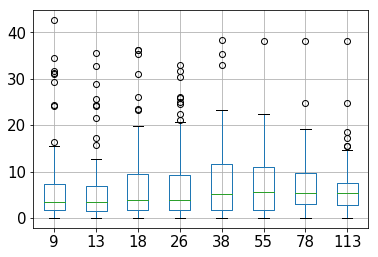

In [119]:
#test.pivot_table(values='Completeness', index=test.index, columns='PCs', aggfunc='first')
test = WDminithres[WDminithres.Threshold=='7kb']
test2 = WDminithres[WDminithres.PCs=='13']
df = test.pivot(index=test.index,columns='PCs')['Contamination']
a = test.PCs.unique()
a = [int(f) for f in a]
a.sort()
a = [str(f) for f in a]
df[a].boxplot()
plt.show()

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


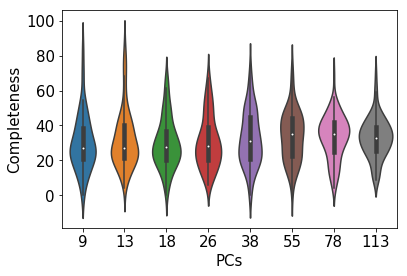

In [107]:
sns.violinplot(x='PCs',y='Completeness',data=test,order=a)
plt.show()

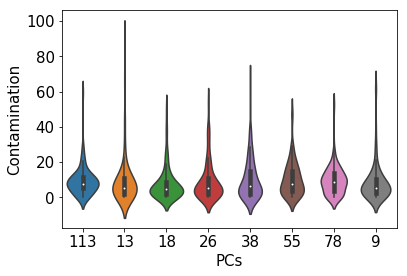

In [40]:
sns.violinplot(x='PCs',y='Contamination',data=test)

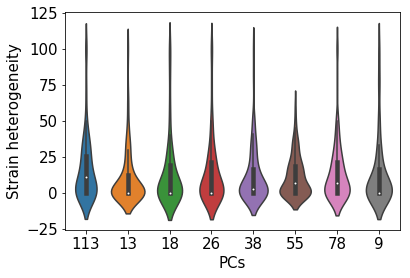

In [41]:
sns.violinplot(x='PCs',y='Strain heterogeneity',data=test)

In [108]:
import sinaplot as sin

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


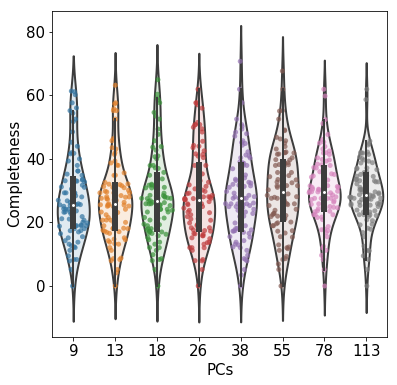

In [120]:
f = plt.figure(figsize=(6,6))
sin.sinaplot(x='PCs',y='Completeness',data=test,point_facealpha=.7
             ,inner='box',linewidth=2,order=a,violin_facealpha=0.150)
plt.show()

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


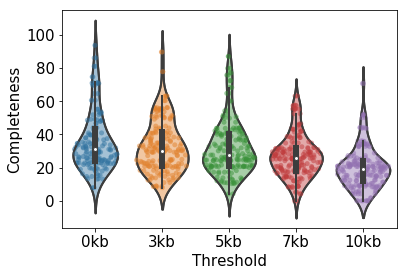

In [118]:
order=['0kb', '3kb', '5kb', '7kb', '10kb']
sin.sinaplot(x='Threshold',y='Completeness',data=test2,point_facealpha=.5,order=order,inner='box',linewidth=2)
plt.show()

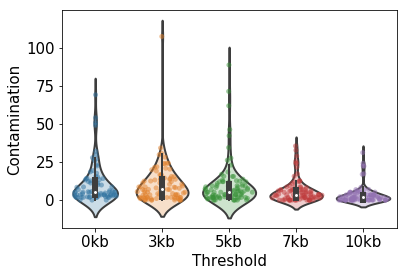

In [57]:
sin.sinaplot(x='Threshold',y='Contamination',data=test2,point_facealpha=.5,order=order,inner='box',linewidth=2)

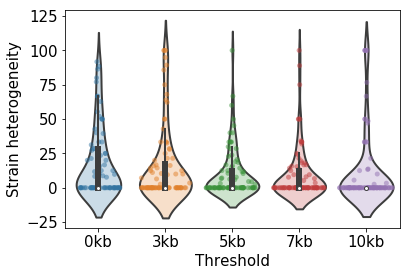

In [58]:
sin.sinaplot(x='Threshold',y='Strain heterogeneity',data=test2,point_facealpha=.5,order=order,inner='box',linewidth=2)

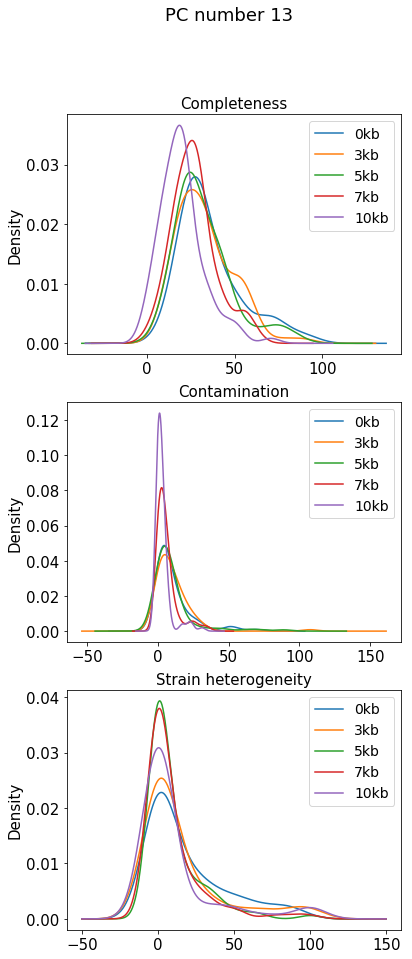

In [10]:
plot_dens(WDminithres,pc)

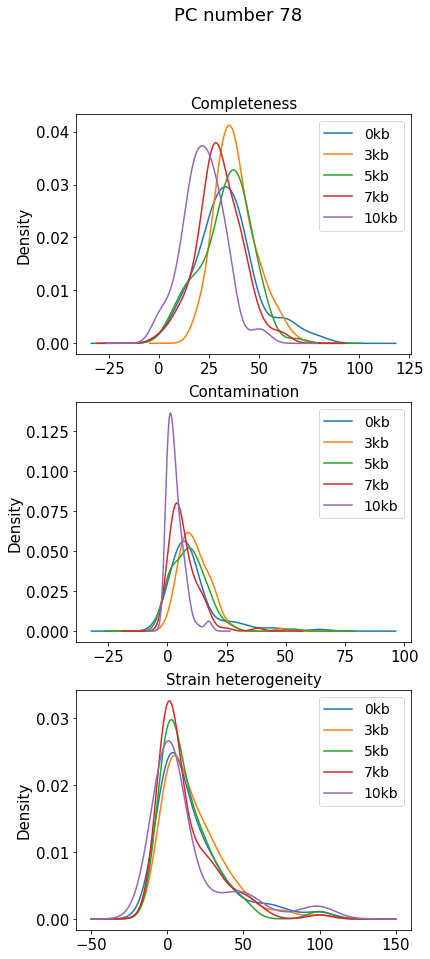

In [11]:
pc='78'
plot_dens(WDminithres,pc)

In [142]:
#choose condition
WDminithres

,marker lineage,Completeness,Contamination,# contigs,Genome size,# genomes,# marker sets,# markers,# predicted genes,Coding density,GC,GC std,Longest contig,Mean contig length,N50 (contigs),Strain heterogeneity,new_idx,PCs,Threshold
0,,,,,,,,,,,,,,,,,,,
WestDock_miniPC18_bin_018,k__Bacteria,93.793103,49.843260,386,3959075,5449,58,104,4041,0.908523,0.404593,0.0463089,47753,10256.7,11080,7.69,WestDock_miniPC18_0kbthres_minCS100_bin_018,18,0kb
WestDock_miniPC13_bin_043,k__Bacteria,93.668831,69.182900,428,4419300,5449,56,102,4654,0.861652,0.448177,0.0306365,44035,10325.5,11071,80.00,WestDock_miniPC13_0kbthres_minCS100_bin_043,13,0kb
WestDock_miniPC26_3kbthres_minCS90_bin_042,k__Bacteria,90.282132,82.680251,442,4600346,5449,58,104,4594,0.874771,0.392187,0.0640946,72046,10408,11372,7.22,WestDock_miniPC26_3kbthres_minCS90_bin_042,26,3kb
WestDock_miniPC13_3kbthres_minCS90_bin_013,k__Bacteria,89.655172,107.507837,517,4921549,5449,58,104,5063,0.890543,0.382832,0.0440425,58401,9519.44,9928,14.43,WestDock_miniPC13_3kbthres_minCS90_bin_013,13,3kb
WestDock_miniPC26_bin_069,k__Bacteria,88.311688,65.611472,437,4730869,5449,56,102,4971,0.864292,0.451909,0.0402048,61713,10825.8,11954,75.00,WestDock_miniPC26_0kbthres_minCS100_bin_069,26,0kb
WestDock_miniPC13_5kbthres_minCS70_bin_092,k__Bacteria,87.017544,88.782562,452,5295513,5449,57,103,5527,0.881212,0.428744,0.0538082,44784,11715.7,12704,28.42,WestDock_miniPC13_5kbthres_minCS70_bin_092,13,5kb
WestDock_miniPC9_3kbthres_minCS90_bin_086,k__Bacteria,86.990596,58.176594,301,3394201,5449,58,104,3536,0.871733,0.443144,0.0285578,44035,11276.4,12533,90.91,WestDock_miniPC9_3kbthres_minCS90_bin_086,9,3kb
WestDock_miniPC9_5kbthres_minCS70_bin_099,k__Bacteria,86.206897,59.587252,237,2996520,5449,58,104,3101,0.878347,0.429065,0.0473192,44035,12643.5,14538,73.68,WestDock_miniPC9_5kbthres_minCS70_bin_099,9,5kb
WestDock_miniPC13_bin_014,p__Bacteroidetes,86.126984,17.634921,314,3197093,350,210,316,3246,0.916249,0.397639,0.0407908,47753,10181.8,11240,27.27,WestDock_miniPC13_0kbthres_minCS100_bin_014,13,0kb
